In [12]:
from pypsdm.io.utils import ROOT_DIR

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from pypsdm.models.input.container.grid import GridContainer
import os

# Input Grid
grid_path = os.path.join(ROOT_DIR, "input", "1-LV-semiurb4--0-no_sw")
sep = ","
grid = GridContainer.from_csv(grid_path, sep)

# Output directory
target_grid_path = os.path.join(ROOT_DIR, "output", "enriched_simbench_grid")

In [14]:
import shutil

# Helper Function to empty output directory


def delete_all_files_in_directory(directory_path):
    if os.path.exists(directory_path) and os.path.isdir(directory_path):
        for filename in os.listdir(directory_path):
            file_path = os.path.join(directory_path, filename)
            try:
                if os.path.isfile(file_path) or os.path.islink(file_path):
                    os.unlink(file_path)
                elif os.path.isdir(file_path):
                    shutil.rmtree(file_path)
            except Exception as e:
                print(f"Failed to delete {file_path}. Reason: {e}")
    else:
        print(f"Directory {directory_path} does not exist or is not a directory.")


delete_all_files_in_directory(target_grid_path)

Directory C:\git\pypsdm\output\enriched_simbench_grid does not exist or is not a directory.


In [15]:
import pandas as pd
from typing import Tuple


# Helper Function to draw random nodes
def draw_nodes(
    df: pd.DataFrame, percentage: float
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Draws a percentage of rows from the DataFrame and returns the drawn rows and remaining rows.

    Args:
        df (pd.DataFrame): The DataFrame to draw nodes from.
        percentage (float): The percentage of rows to draw.

    Returns:
        Tuple[pd.DataFrame, pd.DataFrame]: A tuple containing two DataFrames:
                                           - The drawn rows.
                                           - The remaining rows.
    """
    num_to_draw = int(len(df) * (percentage / 100))
    # Set random_state (e.g., random_state=42) for reproducibility
    drawn_nodes = df.sample(n=num_to_draw)
    remaining_nodes = df.drop(drawn_nodes.index)
    return drawn_nodes, remaining_nodes

In [16]:
import random

# Helper Function to get a normal distribution


def normaldistribution(dist_params):
    normal_variant = random.normalvariate(dist_params[0], dist_params[1])
    return max(min(normal_variant, dist_params[3]), dist_params[2])

## Plot input grid

In [17]:
from pypsdm.plots.grid import grid_plot

grid_plot(grid)

## Filter for LV Nodes

In [18]:
lv_nodes = grid.nodes.data[grid.nodes.data["v_rated"] <= 1.0]
lv_nodes.head()

,geo_position,id,operates_from,operates_until,operator,slack,subnet,v_rated,v_target,volt_lvl,longitude,latitude
uuid,,,,,,,,,,,,
cca492d9-8680-4756-a1c3-416885ec900f,"{""type"":""Point"",""coordinates"":[11.3952,53.6382...",LV4.101 Bus 6,NaN,NaN,NaN,False,2,0.4,1.0,Niederspannung,11.3952,53.6382
b866a7b6-6723-460f-8566-28f4ee4606b8,"{""type"":""Point"",""coordinates"":[11.3941,53.6427...",LV4.101 Bus 26,NaN,NaN,NaN,False,2,0.4,1.0,Niederspannung,11.3941,53.6427
06cb36a2-f4df-446f-a0af-49b27041435a,"{""type"":""Point"",""coordinates"":[11.3913,53.6423...",LV4.101 Bus 38,NaN,NaN,NaN,False,2,0.4,1.0,Niederspannung,11.3913,53.6423
e3792423-73b3-4140-b20c-e8bce24bfc65,"{""type"":""Point"",""coordinates"":[11.3924,53.6427...",LV4.101 Bus 31,NaN,NaN,NaN,False,2,0.4,1.0,Niederspannung,11.3924,53.6427
713ce704-d74c-495d-bd34-3a5a2c884972,"{""type"":""Point"",""coordinates"":[11.3952,53.6386...",LV4.101 Bus 4,NaN,NaN,NaN,False,2,0.4,1.0,Niederspannung,11.3952,53.6386


## Input parameter of the participants that should be added

In [19]:
percentage_em = 100.0

load_mean = 3000
load_sigma = 1500
load_min = 750
load_max = 6000
load_econs_params = [load_mean, load_sigma, load_min, load_max]

s_rated_max = 10.0
s_rated_mean = 7.5
s_rated_min = 5.0
s_rated_sigma = 0.75
pv_s_rated_params = [s_rated_mean, s_rated_sigma, s_rated_min, s_rated_max]
azimuth_max = 90
azimuth_mean = 0
azimuth_min = -90
azimuth_sigma = 15
pv_azimuth_params = [azimuth_mean, azimuth_sigma, azimuth_min, azimuth_max]
elevation_max = 65
elevation_mean = 40
elevation_min = 15
elevation_sigma = 5
pv_elevation_params = [elevation_mean, elevation_sigma, elevation_min, elevation_max]

ev_p_rated_mean = 22.0
ev_p_rated_sigma = 0.0
ev_p_rated_min = 22.0
ev_p_rated_max = 22.0
ev_p_rated_params = [ev_p_rated_mean, ev_p_rated_sigma, ev_p_rated_min, ev_p_rated_max]
evcs_v2g = True

In [20]:
import json
import uuid
from pypsdm.models.input.participant.evcs import EvcsLocationType

# find nodes that have an existing load
household_nodes = lv_nodes[lv_nodes.index.isin(grid.loads.node)]

nodes_with_em, remaining_nodes_without_em = draw_nodes(household_nodes, percentage_em)

load_input_params = [[], [], [], [], [], [], []]
pv_input_params = [[], [], [], [], [], [], []]
ev_params = [[], [], [], [], [], [], [], [], []]
evcs_params = [[], [], [], [], [], [], []]
storage_params = [[], [], [], [], []]
em_params = [[], [], [], []]

node_for_public_pois = household_nodes.iloc[0]
geo_position_public_pois = json.loads(node_for_public_pois.geo_position)
longitude_public_pois, latitude_public_pois = geo_position_public_pois["coordinates"]

data_poi = {
    "uuid": [
        "3ae3a120-a4ab-4057-8b48-022d8b952930",
        "52c73a61-a600-4e02-8ed0-24822cef0aa4",
        "523770be-10a6-4c39-929e-2ed4fc82ff19",
        "8555fdc8-6f8c-40c6-b467-86c3b745e163",
        "a2fdb223-c1ec-4ad9-b558-0f145e4ffd8d",
        "1abce734-a83b-476f-a543-795e60bfe0a2",
        "1a6123e8-3c36-4ffd-a753-234edaaf391e",
        "a1554878-6129-4434-bc54-7111dd20d7ee",
        "020d2e8a-c93a-4042-9972-949e8a6ac2ad",
        "145b3ab5-74a2-4171-b82f-0c7316d45d60",
    ],
    "id": [
        "Culture-poi",
        "Sports-poi",
        "RELIGIOUS-poi",
        "Work-poi",
        "Supermarket-poi",
        "Services-poi",
        "Other_Shop-poi",
        "Medicical-poi1",
        "BBPG-poi",
        "Restaurant-poi",
    ],
    "size": [500, 500, 500, 500, 500, 500, 500, 500, 500, 500],
    "lat": [
        latitude_public_pois,
        latitude_public_pois,
        latitude_public_pois,
        latitude_public_pois,
        latitude_public_pois,
        latitude_public_pois,
        latitude_public_pois,
        latitude_public_pois,
        latitude_public_pois,
        latitude_public_pois,
    ],
    "lon": [
        longitude_public_pois,
        longitude_public_pois,
        longitude_public_pois,
        longitude_public_pois,
        longitude_public_pois,
        longitude_public_pois,
        longitude_public_pois,
        longitude_public_pois,
        longitude_public_pois,
        longitude_public_pois,
    ],
    "categoricallocation": [
        "culture",
        "sports",
        "religious",
        "work",
        "supermarket",
        "services",
        "other_shop",
        "medicinal",
        "bbpg",
        "restaurant",
    ],
}
df_poi = pd.DataFrame(data_poi)
df_poi.set_index("uuid", inplace=True)

data_poimap = {
    #    'poi': ['3ae3a120-a4ab-4057-8b48-022d8b952930','52c73a61-a600-4e02-8ed0-24822cef0aa4','523770be-10a6-4c39-929e-2ed4fc82ff19','8555fdc8-6f8c-40c6-b467-86c3b745e163','a2fdb223-c1ec-4ad9-b558-0f145e4ffd8d','1abce734-a83b-476f-a543-795e60bfe0a2','1a6123e8-3c36-4ffd-a753-234edaaf391e','a1554878-6129-4434-bc54-7111dd20d7ee','020d2e8a-c93a-4042-9972-949e8a6ac2ad','145b3ab5-74a2-4171-b82f-0c7316d45d60','7cefb374-9eb3-4248-b23d-4dc1fa4394ff'] ,
    #'evcs': ["","","","","","","","","","","",],
    #'evs':  ["","","","","","","","","","","",],
    "poi": [],
    "evcs": [],
    "evs": [],
}
df_poimap = pd.DataFrame(data_poimap)
df_poimap.set_index("poi", inplace=True)

# Add Home POI WITHOUT charging
no_charge_home_uuid = "bbf19030-9cea-4c49-bec8-acbfe86ca717"
new_row_poi = {
    "id": "HOME_WITHOUT_CHARGING-poi",
    "size": 500,
    "lat": latitude_public_pois,
    "lon": longitude_public_pois,
    "categoricallocation": "home",
}
df_poi.loc[no_charge_home_uuid] = new_row_poi

for node in nodes_with_em.itertuples(index=True):

    em_uuid = uuid.uuid4()

    load_uuid = uuid.uuid4()
    load_input_params[0].append("load_" + str(node.id))
    load_input_params[1].append(load_uuid)
    load_input_params[2].append(node[0])
    load_input_params[3].append(3.0)
    load_input_params[4].append(normaldistribution(load_econs_params))
    load_input_params[5].append("h0")
    load_input_params[6].append(em_uuid)

    pv_input_params[0].append("pv_" + str(node.id))
    pv_srated = normaldistribution(pv_s_rated_params)
    pv_input_params[1].append(pv_srated)
    pv_input_params[2].append(normaldistribution(pv_azimuth_params))
    pv_input_params[3].append(normaldistribution(pv_elevation_params))
    pv_input_params[4].append(node[0])
    pv_uuid = uuid.uuid4()
    pv_input_params[5].append(pv_uuid)
    pv_input_params[6].append(em_uuid)

    node_id = node.id
    ev_uuid = uuid.uuid4()
    ev_type_uuid = uuid.uuid4()
    evcs_uuid = uuid.uuid4()
    evcs_id = "EVCS_" + str(node_id)
    poi_uuid = uuid.uuid4()
    geo_position = json.loads(node.geo_position)
    longitude, latitude = geo_position["coordinates"]

    ev_p_rated = normaldistribution(ev_p_rated_params)

    ev_params[0].append("EV_" + str(node_id))
    ev_params[1].append(ev_uuid)
    ev_params[2].append(ev_type_uuid)
    ev_params[3].append(node[0])
    ev_params[4].append(ev_p_rated)  # AC
    ev_params[5].append(ev_p_rated)  # DC
    ev_params[6].append(120.0)
    ev_params[7].append(0.18)

    evcs_params[0].append(evcs_id)
    evcs_params[1].append(evcs_uuid)
    evcs_params[2].append(node[0])
    evcs_params[3].append(EvcsLocationType.HOME.value)
    evcs_params[4].append(22.0)

    if evcs_v2g:
        evcs_params[5].append("true")
    else:
        evcs_params[5].append("false")
    evcs_params[6].append(em_uuid)

    storage_uuid = uuid.uuid4()
    storage_params[0].append("Storage_" + str(node_id))
    storage_params[1].append(storage_uuid)
    storage_params[2].append(node[0])
    storage_params[3].append(1.5 * pv_srated)
    storage_params[4].append(em_uuid)

    em_params[0].append("em_" + str(node_id))
    em_params[1].append(em_uuid)
    em_params[2].append(node[0])
    em_params[3].append("PRIORITIZED")

    # POI Mapping
    current_id = evcs_id
    new_row_poi = {
        "uuid": poi_uuid,
        "id": "POI_" + current_id.__str__(),
        "size": 1,
        "lat": latitude,
        "lon": longitude,
        "categoricallocation": "home",
    }
    df_poi.loc[poi_uuid] = new_row_poi
    new_row_mapping = {
        "poi": poi_uuid,
        "evcs": evcs_uuid,
        "evs": ev_uuid,
    }
    df_poimap.loc[poi_uuid] = new_row_mapping

In [21]:
from pypsdm.models.input.create.participants import create_loads

load_data_dict = {
    "id": load_input_params[0],
    "uuid": load_input_params[1],
    "node": load_input_params[2],
    "s_rated": load_input_params[3],
    "e_cons_annual": load_input_params[4],
    "load_profile": load_input_params[5],
    "controlling_em": load_input_params[6],
}

loads = create_loads(load_data_dict)

In [22]:
from pypsdm.models.input.create.participants import create_pvs

data_dict = {
    "id": pv_input_params[0],
    "node": pv_input_params[4],
    "s_rated": pv_input_params[1],
    "azimuth": pv_input_params[2],
    "elevation_angle": pv_input_params[3],
    "uuid": pv_input_params[5],
    "controlling_em": pv_input_params[6],
}

pvs = create_pvs(data_dict)

In [23]:
from pypsdm.models.input.create.participants import create_electric_vehicles
from pypsdm.models.input.create.participants import create_ev_charging_stations

data_dict = {
    "id": ev_params[0],
    "uuid": ev_params[1],
    "type_uuid": ev_params[2],
    "node": ev_params[3],
    "s_rated": ev_params[4],
    "s_ratedDC": ev_params[5],
    "e_storage": ev_params[6],
    "e_cons": ev_params[7],
}

evs = create_electric_vehicles(data_dict)

data_dict = {
    "id": evcs_params[0],
    "node": evcs_params[2],
    "location_type": evcs_params[3],
    "s_rated": evcs_params[4],
    "uuid": evcs_params[1],
    "v2g_support": evcs_params[5],
    "controlling_em": evcs_params[6],
}

evcs = create_ev_charging_stations(data_dict)

In [24]:
from pypsdm.models.input.create.participants import create_storages

data_dict = {
    "id": storage_params[0],
    "uuid": storage_params[1],
    "node": storage_params[2],
    "e_storage": storage_params[3],
    "controlling_em": storage_params[4],
}

bs = create_storages(data_dict)

In [25]:
from pypsdm.models.input.create.participants import create_energy_management_systems

data_dict = {
    "id": em_params[0],
    "uuid": em_params[1],
    "node": em_params[2],
    "control_strategy": em_params[3],
}

controlling_emss = create_energy_management_systems(data_dict)

In [26]:
from pypsdm.models.input.container.participants import SystemParticipantsContainer
from pypsdm.models.input.participant.bm import BiomassPlants
from pypsdm.models.input.participant.fixed_feed_in import FixedFeedIns
from pypsdm.models.input.participant.wec import WindEnergyConverters
from pypsdm.models.input.participant.hp import HeatPumps

participants = SystemParticipantsContainer(
    controlling_ems=controlling_emss,
    loads=loads,
    pvs=pvs,
    storages=bs,
    evs=evs,
    evcs=evcs,
    hps=HeatPumps.create_empty(),
    wecs=WindEnergyConverters.create_empty(),
    fixed_feed_ins=FixedFeedIns.create_empty(),
    biomass_plants=BiomassPlants.create_empty(),
)
node_participants = participants.build_node_participants_map(grid.raw_grid.nodes)

In [27]:
from pypsdm.models.input.participant.evs import ElectricVehicles

node_connected_assets = {}
for node, nodal_participants in node_participants.items():
    participant_uuids = []
    for current in nodal_participants.to_list():
        if isinstance(current, ElectricVehicles):
            continue
        participant_uuids.extend(list(current.uuid))
    node_connected_assets[node] = participant_uuids
updated_participants = SystemParticipantsContainer(
    controlling_emss,
    participants.loads,
    participants.fixed_feed_ins,
    participants.pvs,
    participants.biomass_plants,
    participants.wecs,
    participants.storages,
    participants.evs,
    participants.evcs,
    participants.hps,
)

In [28]:
node_participants_map = updated_participants.build_node_participants_map(
    grid.raw_grid.nodes
)
updated_grid = GridContainer(
    grid.raw_grid, updated_participants, grid.primary_data, node_participants_map
)

In [30]:
if not os.path.exists(target_grid_path):
    os.mkdir(target_grid_path)

updated_grid.to_csv(target_grid_path, include_primary_data=False)
pois_path = os.path.join(target_grid_path, "pois")

if not os.path.exists(pois_path):
    os.mkdir(pois_path)
df_poi.to_csv(pois_path + "/poi.csv", index_label="uuid")
df_poimap.to_csv(pois_path + "/poi_mapping.csv", index=True)

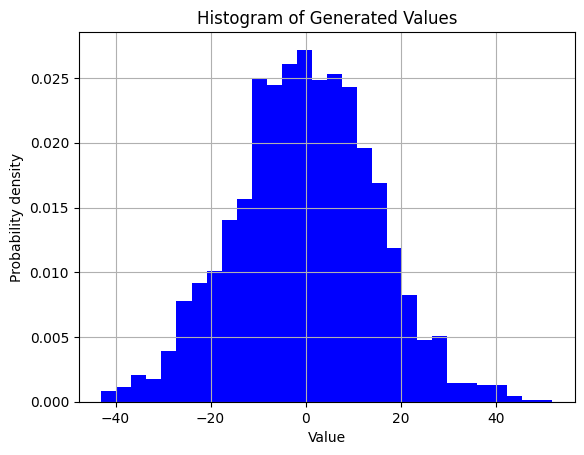

In [31]:
import matplotlib.pyplot as plt

# Create a histogram plot to analyse input params of normal distribution
dist_max = 90
dist_mean = 0
dist_min = -90
dist_sigma = 15
distribution_params = [dist_mean, dist_sigma, dist_min, dist_max]

hist_in = []
for i in range(2000):
    res = normaldistribution(distribution_params)
    hist_in.append(res)


plt.hist(hist_in, bins=30, density=True, alpha=1.0, color="b")
plt.xlabel("Value")
plt.ylabel("Probability density")
plt.title("Histogram of Generated Values")
plt.grid(True)

plt.show()